tb - 6/30/2022 - The goal of this notebook is to select the simple analytic models trained on both climates (see notebook 092) using a simple (performance,complexity) space.

# Initialization and imports

## Import libraries

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np
import pickle as pkl

In [6]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

In [7]:
cmap0 = cm.get_cmap('Paired', 6)

## Define paths of polynomial fits

In [8]:
save_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/Polynomial_Fits/'

In [9]:
path_prefix = save_folder+'2022_06_30_dicQT_'

In [10]:
path_array = ['localBF','localCI','BF','CI','local','all']

In [11]:
N_degree = 4

In [12]:
dic = {}

In [17]:
for isample in range(3):
    dic[isample] = {}
    for ipath,path in enumerate(path_array):
        dic[isample][ipath] = pkl.load(open(path_prefix+path+
                                            '_isample_'+str(isample)+'.pkl','rb'))

FileNotFoundError: [Errno 2] No such file or directory: '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/Polynomial_Fits/2022_06_30_dicQT_all_isample_2.pkl'

In [18]:
marker_array = ['o','*','p','P']

localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all


KeyError: 5

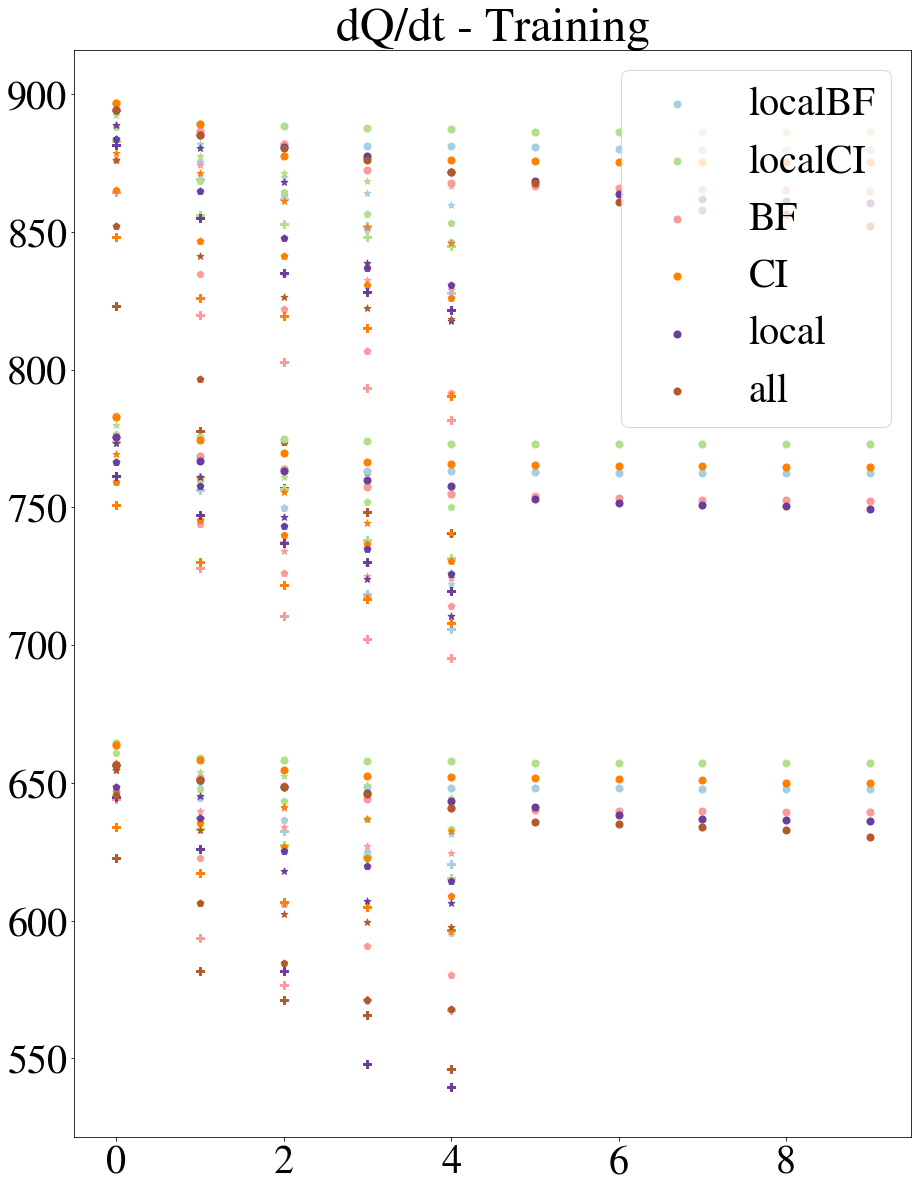

In [39]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dQ/dt - Training')
for isample in range(3):
    for ipath,path in enumerate(path_array):
        print(path)
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                ax.scatter(n_variables,
                           dic[isample][ipath]['Qfits'][degree]\
                           ['Number of variables %d'%(n_variables+1)]['mse_train'],
                           s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],
                          label=label)
    if isample==0: plt.legend()

KeyError: 5

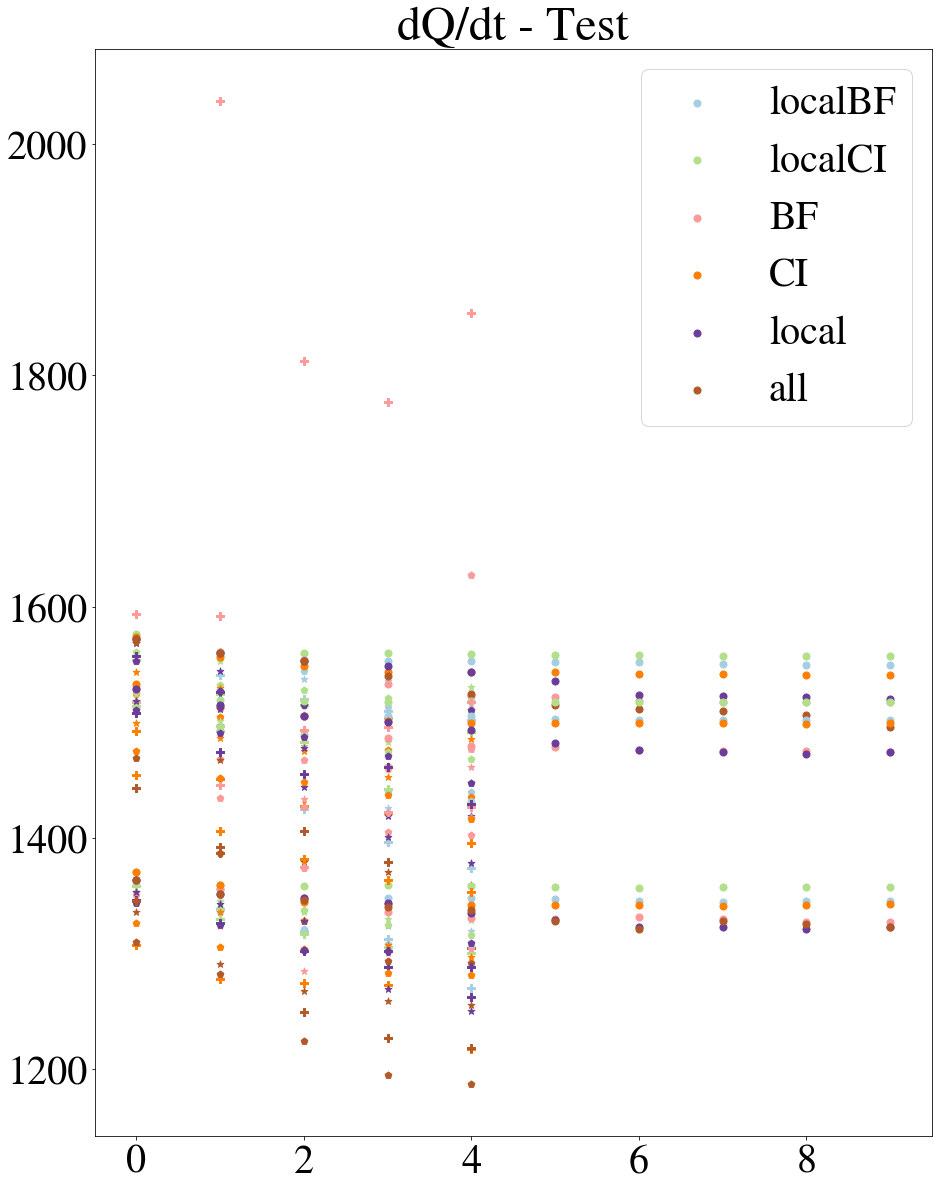

In [41]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dQ/dt - Test')
for isample in range(3):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                tmse = dic[isample][ipath]['Qfits'][degree]['Number of variables %d'%(n_variables+1)]['mse_test']
                ax.scatter(n_variables,(tmse['m4K']+tmse['ref']+tmse['p4K'])/3,
                s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],label=label)
    if isample==0: plt.legend()

localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all
localBF
localCI
BF
CI
local
all


KeyError: 5

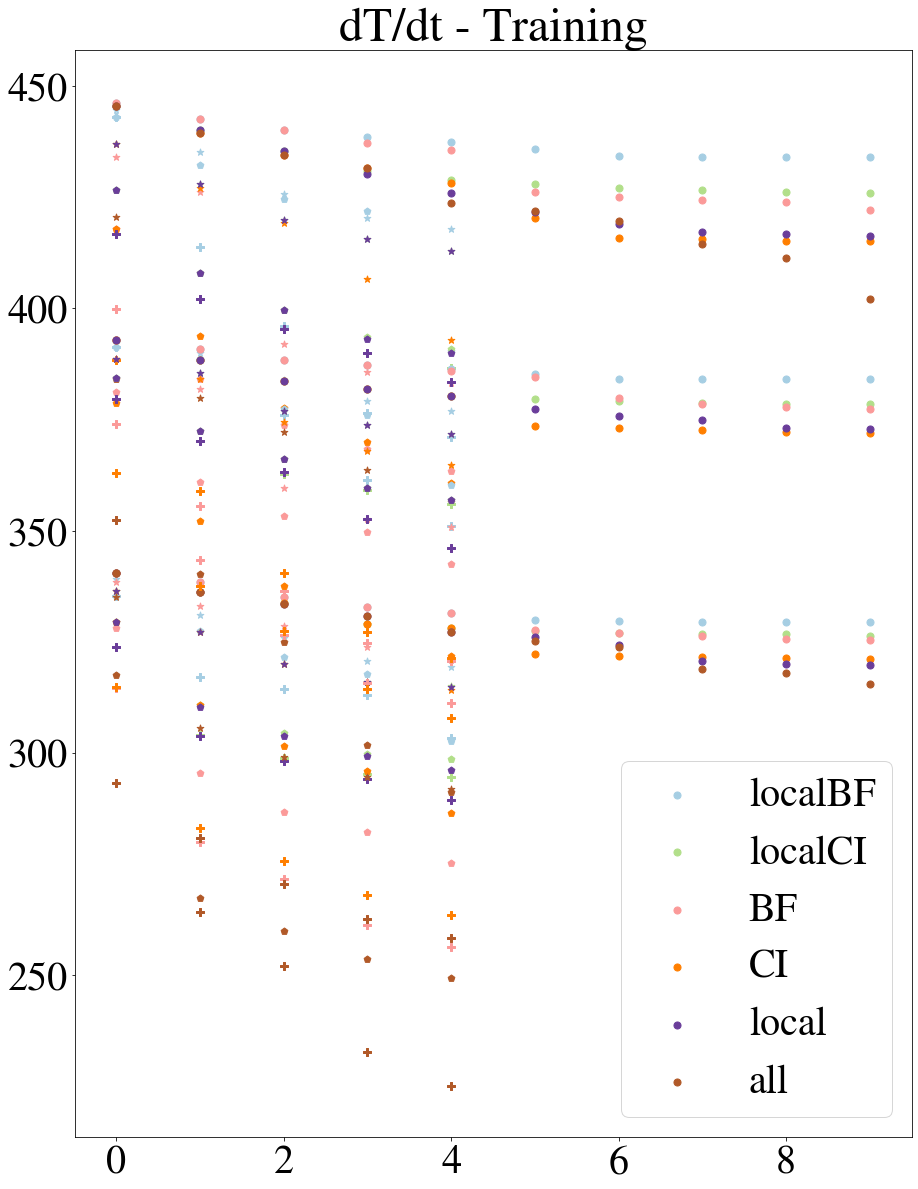

In [42]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dT/dt - Training')
for isample in range(3):
    for ipath,path in enumerate(path_array):
        print(path)
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                ax.scatter(n_variables,
                           dic[isample][ipath]['Tfits'][degree]\
                           ['Number of variables %d'%(n_variables+1)]['mse_train'],
                           s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],
                          label=label)
    if isample==0: plt.legend()

KeyError: 5

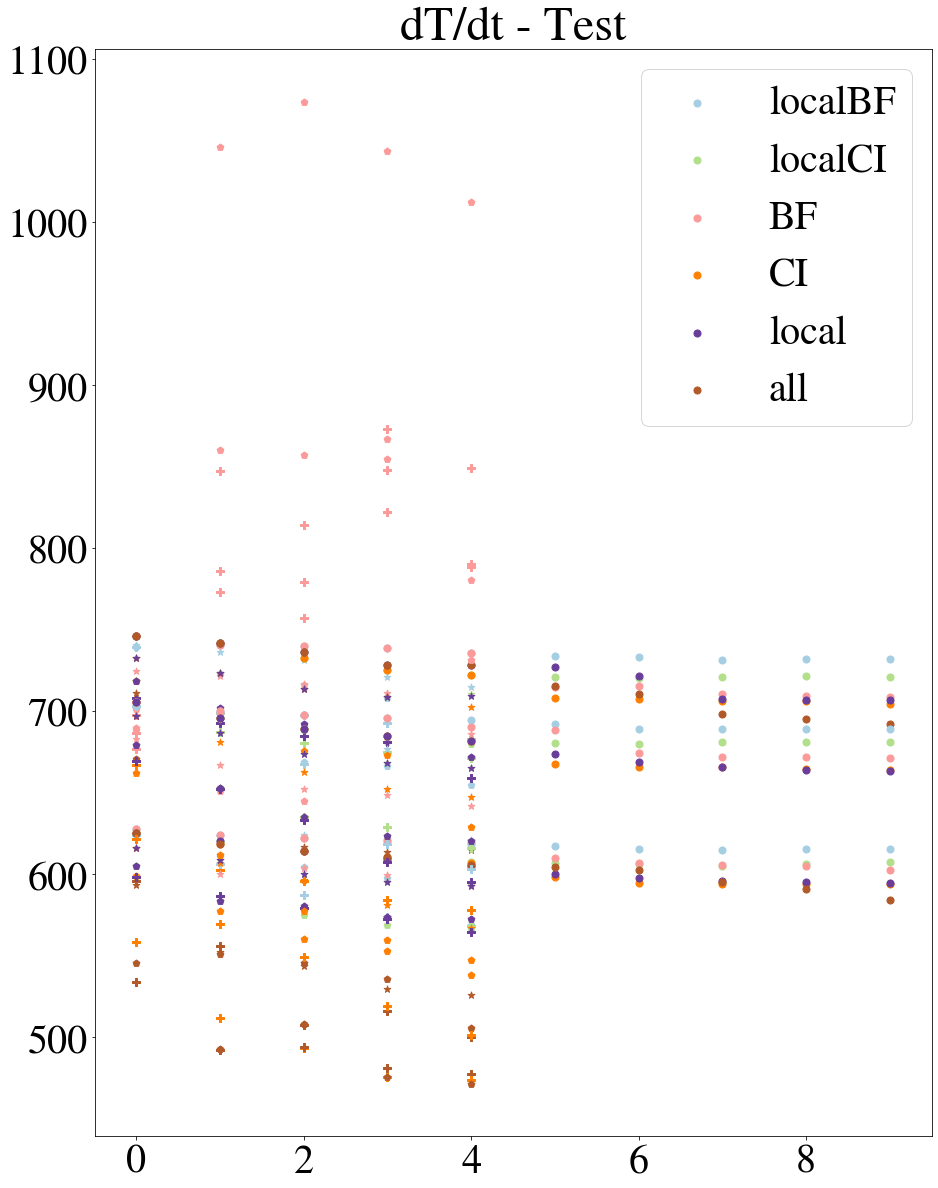

In [43]:
fig, ax = plt.subplots(1,1,figsize=(15,20))

plt.title('dT/dt - Test')
for isample in range(3):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                if isample==0 and degree==1 and n_variables==0: label = path;
                else: label = ''
                tmse = dic[isample][ipath]['Tfits'][degree]['Number of variables %d'%(n_variables+1)]['mse_test']
                ax.scatter(n_variables,(tmse['m4K']+tmse['ref']+tmse['p4K'])/3,
                s=siz/2,color=cmap0(ipath),marker=marker_array[degree-1],label=label)
    if isample==0: plt.legend()

# Find top terms found by SFS for each model

In [45]:
key_to_drop = ['LR_Bias','mse_train','mse_test']

In [64]:
terms = {}
for ipath,path in enumerate(path_array):
    terms[path] = {}

In [65]:
for isample in range(3):
    for ipath,path in enumerate(path_array):
        for degree in np.arange(1,N_degree+1):
            if degree==1: Nvar = 10
            else: Nvar = 5
            for n_variables in range(Nvar):
                # Eliminate keys that are not variables
                tmp = dic[isample][ipath]['Tfits'][degree]\
                ['Number of variables %d'%(n_variables+1)].copy()
                for key in key_to_drop: tmp.pop(key)
                # Add them to terms if it doesn't already have them
                # In all cases, assign coefficient and add occurence
                for var in tmp.keys():
                    if var not in terms[path]: 
                        terms[path][var] = {};
                        terms[path][var]['count'] = 0
                        terms[path][var]['coef'] = 0
                    terms[path][var]['coef'] = (tmp[var]+\
                    terms[path][var]['count']*terms[path][var]['coef'])/\
                    (terms[path][var]['count']+1)
                    terms[path][var]['count'] += 1

KeyError: 5

In [99]:
term = {}

In [100]:
for ipath,path in enumerate(path_array):
    term[path] = {}
    tmp = []
    nam = []
    val = []
    for var in terms[path].keys():
        tmp.append(terms[path][var]['count'])
        nam.append(var)
        val.append(terms[path][var]['coef'])
    arg0 = np.argsort(tmp)[::-1]
    term[path]['variables'] = np.array(nam)[arg0]
    term[path]['coef'] = np.array(val)[arg0]
    term[path]['count'] = np.array(tmp)[arg0]

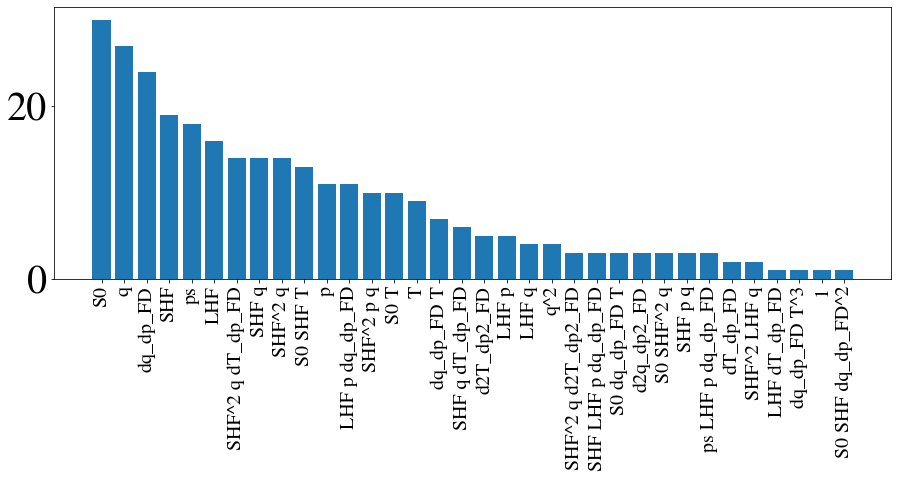

In [136]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.bar(term['localBF']['variables'],term['localBF']['count'])
plt.xticks(rotation=90);
plt.xticks(fontsize=fz/2);

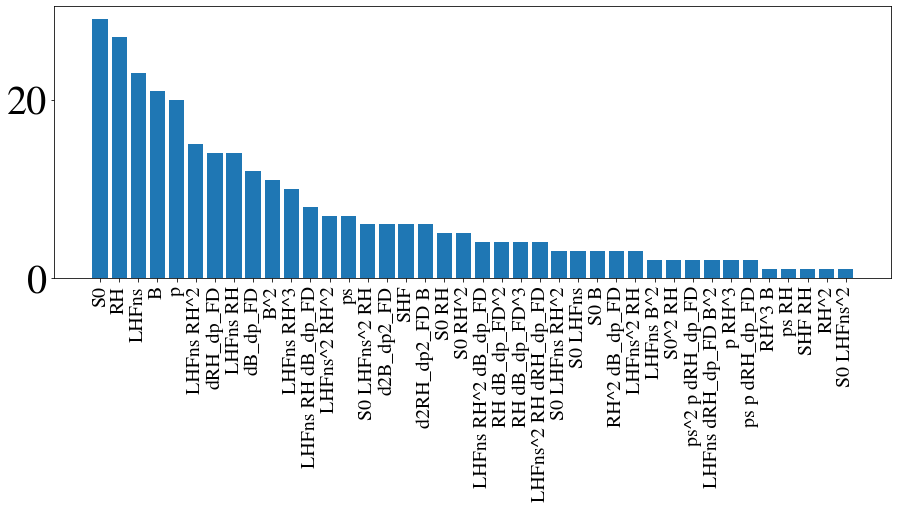

In [138]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.bar(term['localCI']['variables'],term['localCI']['count'])
plt.xticks(rotation=90);
plt.xticks(fontsize=fz/2);

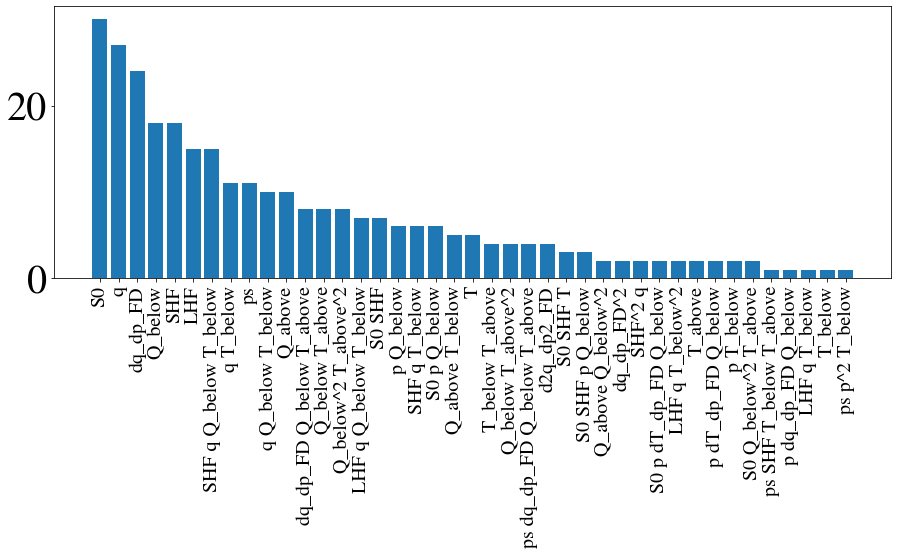

In [140]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.bar(term['BF']['variables'],term['BF']['count'])
plt.xticks(rotation=90);
plt.xticks(fontsize=fz/2);

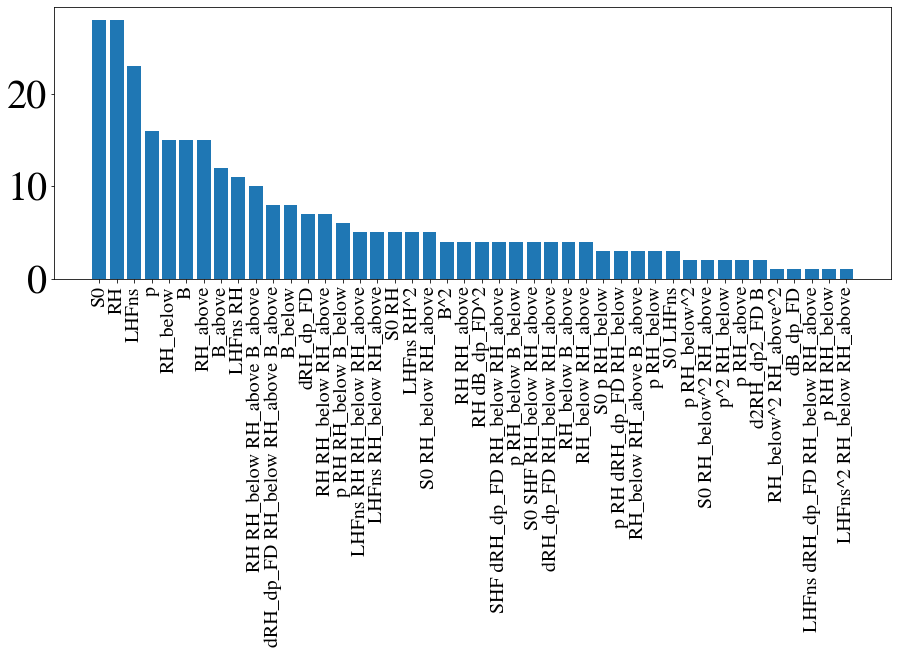

In [142]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.bar(term['CI']['variables'],term['CI']['count'])
plt.xticks(rotation=90);
plt.xticks(fontsize=fz/2);